#### Melakukan setup untuk dapat mengunduh dataset secara langsung pada Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [ ]:
! kaggle datasets download -d wisnuanggara/daftar-harga-rumah

  0% 0.00/109k [00:00<?, ?B/s]
100% 109k/109k [00:00<00:00, 50.7MB/s]


In [ ]:
! unzip daftar-harga-rumah.zip

Archive:  daftar-harga-rumah.zip
  inflating: DATA RUMAH.xlsx         
  inflating: HARGA RUMAH JAKSEL.xlsx  


#### Melakukan import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Mengimport dataset dan memasukkannya kedalam DataFrame

In [ ]:
file_name = '/content/DATA RUMAH.xlsx'
df = pd.read_excel(file_name)

df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


Mengganti tipe beberapa data menjadi tipe object

In [ ]:
df[['KT', 'KM', 'GRS']] = df[['KT', 'KM', 'GRS']].astype(str).astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   object
 6   KM          1010 non-null   object
 7   GRS         1010 non-null   object
dtypes: int64(4), object(4)
memory usage: 63.2+ KB


Membuat kolom baru berupa harga dalam satuan juta, dan membuang kolom nomor, nama rumah, dan harga

In [ ]:
df['HARGA (JT)'] = df['HARGA']//1000000
df = df.drop(columns=['NO', 'HARGA', 'NAMA RUMAH'])
df

,LB,LT,KT,KM,GRS,HARGA (JT)
0,220,220,3,3,0,3800
1,180,137,4,3,2,4600
2,267,250,4,4,4,3000
3,40,25,2,2,0,430
4,400,355,6,5,3,9000
...,...,...,...,...,...,...
1005,450,550,10,10,3,9000
1006,160,140,4,3,2,4000
1007,139,230,4,4,1,4000
1008,360,606,7,4,0,19000


In [ ]:
df.describe()

,LB,LT,HARGA (JT)
count,1010.000000,1010.000000,1010.000000
mean,276.539604,237.432673,7628.982178
std,177.864557,179.957604,7340.945285
min,40.000000,25.000000,430.000000
25%,150.000000,130.000000,3262.500000
50%,216.500000,165.000000,5000.000000
75%,350.000000,290.000000,9000.000000
max,1126.000000,1400.000000,65000.000000


#### EDA

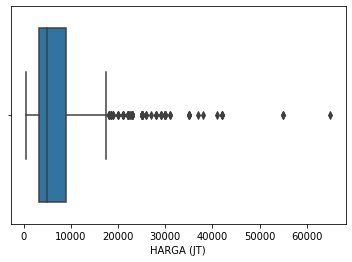

In [ ]:
sns.boxplot(x=df['HARGA (JT)'])

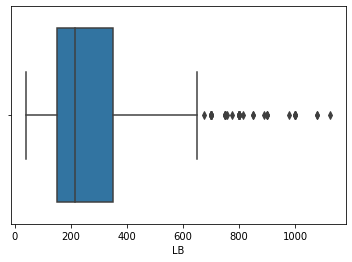

In [ ]:
sns.boxplot(x=df['LB'])

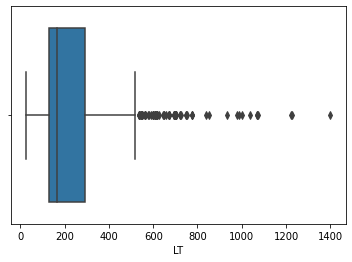

In [ ]:
sns.boxplot(x=df['LT'])

Karena data memiliki outliers yang besar, maka digunakan teknik IQR untuk menangani outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(883, 6)

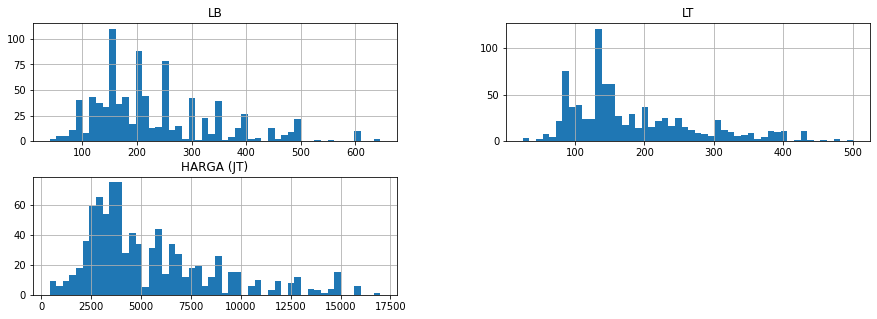

In [ ]:
df.hist(bins=50, figsize=(15,5))
plt.show()

In [ ]:
categorical_features = ['KT', 'KM', 'GRS']

    jumlah kamar tidur  persentase
4                  276        31.3
5                  222        25.1
3                  196        22.2
6                   77         8.7
7                   40         4.5
2                   31         3.5
8                   24         2.7
9                   14         1.6
10                   3         0.3


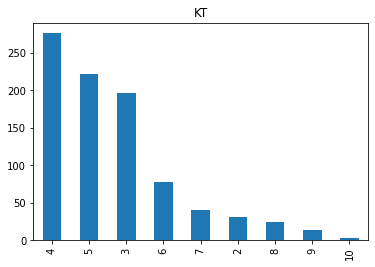

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
new_df = pd.DataFrame({'jumlah kamar tidur': count,
                   'persentase': percent.round(1)})
print(new_df)
count.plot(kind='bar', title=feature)

    jumlah kamar mandi  persentase
3                  291        33.0
4                  253        28.7
2                  174        19.7
5                   88        10.0
6                   33         3.7
1                   29         3.3
8                    9         1.0
7                    4         0.5
9                    1         0.1
10                   1         0.1


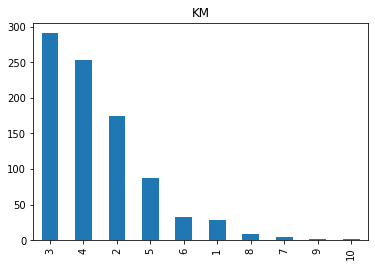

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
new_df = pd.DataFrame({'jumlah kamar mandi': count,
                   'persentase': percent.round(1)})
print(new_df)
count.plot(kind='bar', title=feature)

   jumlah mobil yang muat dalam garasi  persentase
2                                  335        37.9
1                                  280        31.7
0                                  117        13.3
3                                   88        10.0
4                                   51         5.8
5                                    7         0.8
6                                    5         0.6


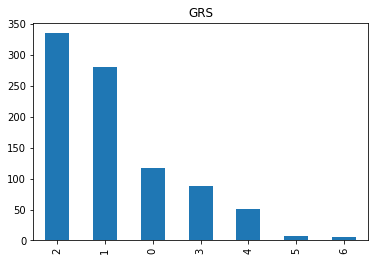

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
new_df = pd.DataFrame({'jumlah mobil yang muat dalam garasi': count,
                   'persentase': percent.round(1)})
print(new_df)
count.plot(kind='bar', title=feature)

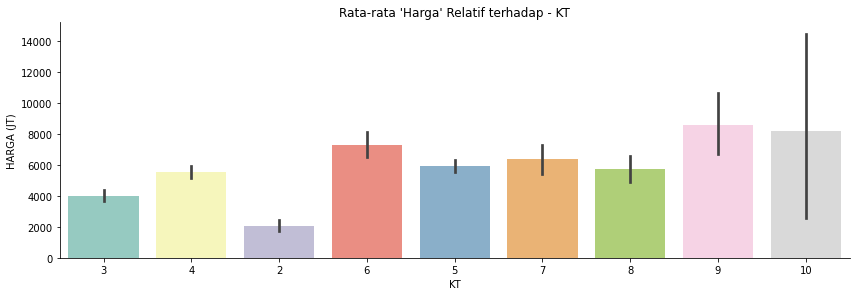

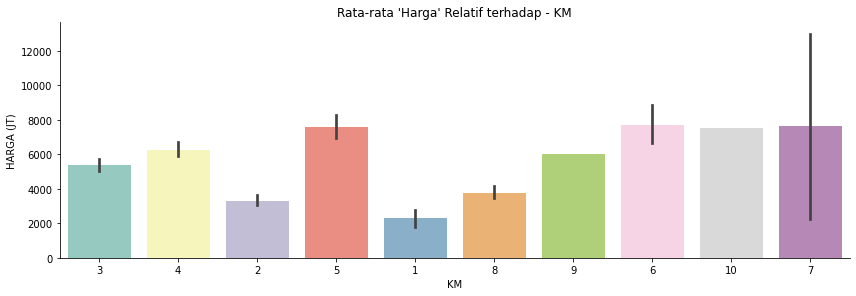

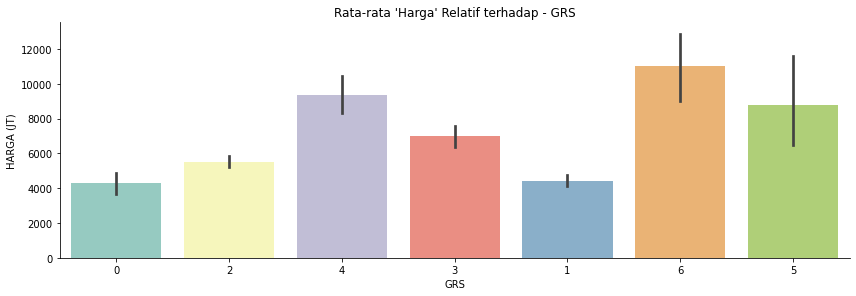

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="HARGA (JT)", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Harga' Relatif terhadap - {}".format(col))

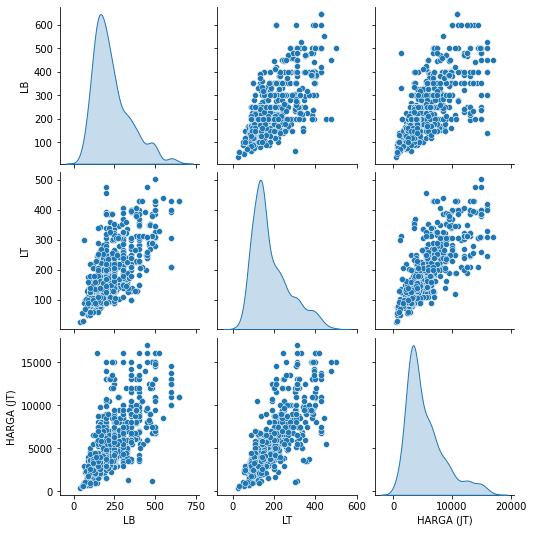

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Membuat heatmap untuk melihat korelasi pada fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

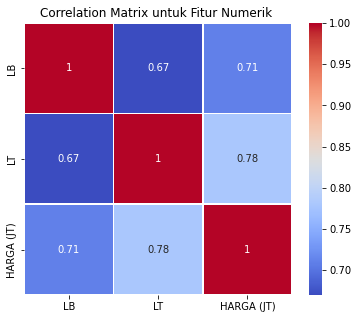

In [ ]:
plt.figure(figsize=(6, 5))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=12)

Melakukan One Hot Encoding pada beberapa fitur kategorikal

In [ ]:
df = pd.concat([df, pd.get_dummies(df['KT'], prefix='KT')],axis=1)
df = pd.concat([df, pd.get_dummies(df['KM'], prefix='KM')],axis=1)
df = pd.concat([df, pd.get_dummies(df['GRS'], prefix='GRS_MOBIL')],axis=1)
df.drop(['KT', 'KM', 'GRS'], axis=1, inplace=True)

In [ ]:
df

,LB,LT,HARGA (JT),KT_10,KT_2,KT_3,KT_4,KT_5,KT_6,KT_7,...,KM_7,KM_8,KM_9,GRS_MOBIL_0,GRS_MOBIL_1,GRS_MOBIL_2,GRS_MOBIL_3,GRS_MOBIL_4,GRS_MOBIL_5,GRS_MOBIL_6
0,220,220,3800,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,180,137,4600,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,267,250,3000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,25,430,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,400,355,9000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,60,30,600,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1004,100,140,2600,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1006,160,140,4000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1007,139,230,4000,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


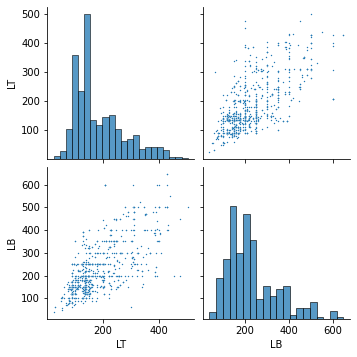

In [ ]:
sns.pairplot(df[['LT', 'LB']], plot_kws={"s": 2});

Membagi data menjadi train dan test

In [ ]:
X = df.drop(["HARGA (JT)"],axis =1)
y = df["HARGA (JT)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Melakukan standarisasi

In [ ]:
numerical_features = ['LT', 'LB']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,LT,LB
874,-1.080737,-0.837829
299,-0.162525,0.135045
815,-0.554445,-0.130284
228,-0.128932,0.931032
992,-1.058342,-0.307171


In [ ]:
X_train[numerical_features].describe().round(2)

,LT,LB
count,706.00,706.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.79,-1.72
25%,-0.67,-0.75
50%,-0.39,-0.31
75%,0.52,0.58
max,3.25,3.64


#### Membuat model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['Boosting', 'RandomForest', 'knn'])

In [ ]:
RF = RandomForestRegressor(n_estimators=150, max_depth=16, random_state=100)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [ ]:
boosting = AdaBoostRegressor(random_state=100, learning_rate=0.001, n_estimators=50)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models

,Boosting,RandomForest,knn
train_mse,3173253.300739,526160.766821,3067851.537665
test_mse,NaN,NaN,NaN


In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Membuat metrik MSE untuk menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai yang diprediksi

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting', 'KNN'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'Boosting': boosting, 'KNN': knn}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e4
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e4
 
# Panggil mse
mse

,train,test
RF,52.616077,237.060627
Boosting,317.32533,344.75185
KNN,306.785154,332.685766


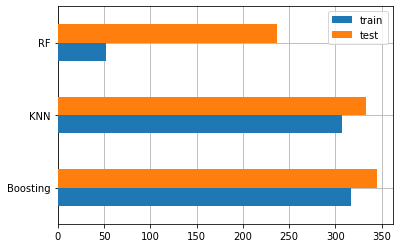

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [41]:
prediksi = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting,prediksi_KNN
670,3800,4196.1,4781.6,4830.8
772,4340,2568.6,2788.4,3100.0
830,6700,5943.3,4861.2,5753.8
375,3000,5957.2,5104.0,5226.9
650,14500,11788.6,10288.0,8792.3
160,2999,2810.3,3419.5,3226.9
700,5000,5420.5,6716.5,4076.5
64,4500,3916.2,3230.8,4825.8
370,2500,2195.0,2788.4,2199.8
415,3500,3809.1,3460.1,3819.2


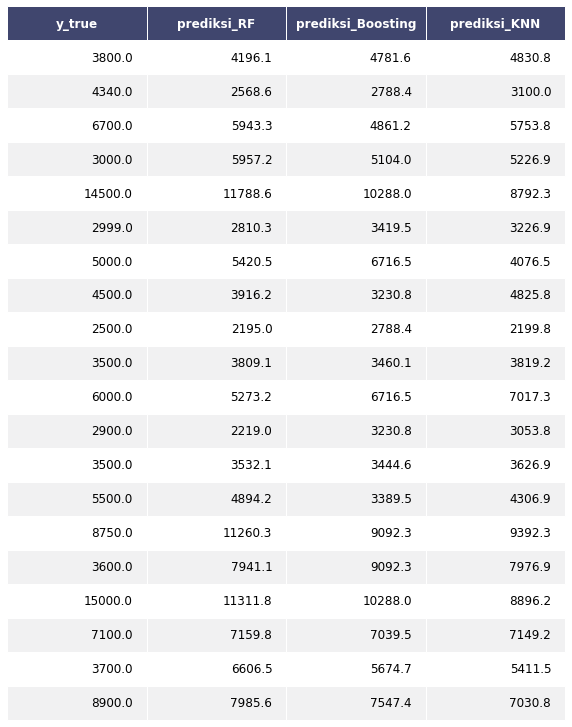

In [51]:
def render_predict_table(data, col_width=7.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    predict_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    predict_table.auto_set_font_size(False)
    predict_table.set_fontsize(font_size)

    for k, cell in predict_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_predict_table(pd.DataFrame(pred_dict), header_columns=0, col_width=2.5)
fig.savefig("table_predict.png")

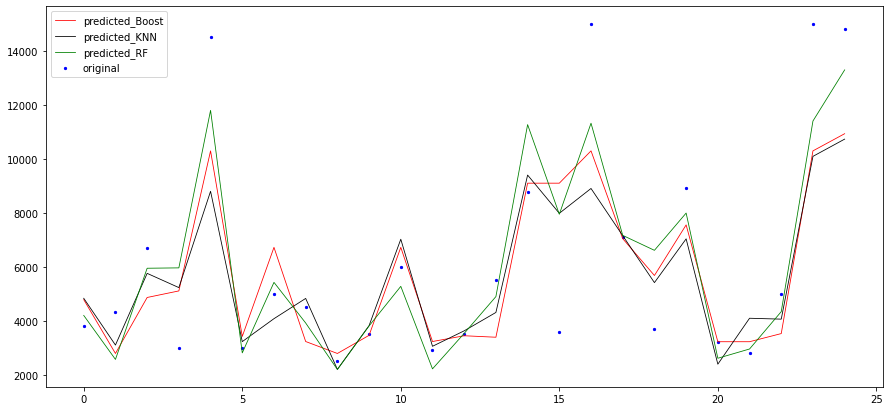

In [ ]:
x_ax = range(len(y_test[:25]))
plt.figure(figsize=(15,7))
plt.scatter(x_ax, y_test[:25], s=5, color="blue", label="original")
plt.plot(x_ax, boosting.predict(X_test.iloc[:25]), lw=0.8, color="red", label="predicted_Boost")
plt.plot(x_ax, knn.predict(X_test.iloc[:25]), lw=0.8, color="black", label="predicted_KNN")
plt.plot(x_ax, RF.predict(X_test.iloc[:25]), lw=0.8, color="green", label="predicted_RF")
plt.legend()
plt.show()